In [1]:
import networkx as nx
import numpy as np
import utilities as util
import os
import seaborn as sns
from tabulate import tabulate

['C:\\Users\\drobi\\Desktop\\uni\\CS4195\\higgs-twitter-network-science\\Network-analysis', 'C:\\Users\\drobi\\Anaconda3\\python39.zip', 'C:\\Users\\drobi\\Anaconda3\\DLLs', 'C:\\Users\\drobi\\Anaconda3\\lib', 'C:\\Users\\drobi\\Anaconda3', '', 'C:\\Users\\drobi\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\drobi\\Anaconda3\\lib\\site-packages', 'C:\\Users\\drobi\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\drobi\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\drobi\\Anaconda3\\lib\\site-packages\\Pythonwin', '../']


In [2]:
os.chdir('../')
df_reply = util.create_df_from_edge_list('network-data/higgs-reply_network.edgelist')
os.chdir('Network-analysis/')
G_reply = util.create_graph_from_df(df_reply, edge_attr='Day', isDirected=True)

In [4]:
num_nodes = G_reply.number_of_nodes()
num_edges = G_reply.number_of_edges()
avg_degree = util.get_avg_degree(G_reply)
var_degree = util.get_var_degree_distribution(G_reply)
std_degree = np.sqrt(var_degree)

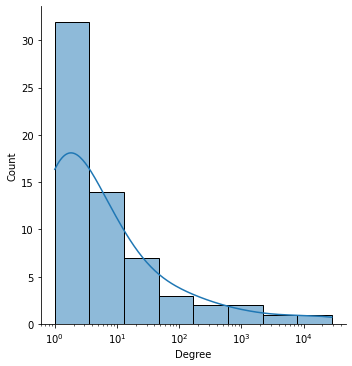

In [5]:
degree_distribution = util.get_degree_distribution(G_reply)
ax = sns.displot(degree_distribution, kde=True, log_scale=True)
ax.set(xlabel='Degree', ylabel='Count')

In [6]:
print(nx.is_connected(G_reply))

NetworkXNotImplemented: not implemented for directed type

In [ ]:
# Average shortest path length
# avg_shortest_path = nx.average_shortest_path_length(G_reply) NetworkXError: Graph is not fully connected
# Get all shortest paths
# shortest_paths = dict(nx.all_pairs_shortest_path_length(G_reply))
# Diameter
# diameter = nx.diameter(G_reply) NetworkXError: Found infinite path length because the digraph is not strongly connected.
# Betweenness centrality
betweenness = nx.betweenness_centrality(G_reply)
# Clustering coefficient
clustering = nx.average_clustering(G_reply)
# Calculate the degree correlation coefficient
degree_assortativity = nx.degree_assortativity_coefficient(G_reply)
# Largest eigenvalue
A = nx.adjacency_matrix(G_reply).todense()
eigenvalues, _ = np.linalg.eig(A)
lambda1 = max(eigenvalues)

In [6]:
# Put all metrics in a table, to implement this in the report.
table = [
    ["Number of nodes", num_nodes],
    ["Number of edges", num_edges],
    ["Average degree", round(avg_degree, 2)],
    ["Standard deviation degree",round(std_degree, 2)],
    ["Betweenness",round(betweenness, 2)],
    ["Degree assortativity", round(degree_assortativity, 2)],
    ["Clustering coefficient",round(clustering, 2)],
    ["Largest eigenvalue",round(lambda1, 2)]
    ]
headers = ["Metric", "Value"]
print(tabulate(table, headers, tablefmt="fancy_grid", numalign="right"))

NameError: name 'betweenness' is not defined